Shape of dataset: (150001, 55)
Columns:
 Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       '

C:\Users\KARAN\AppData\Local\Temp\ipykernel_19316\1525293252.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Top 10 Handsets:
 Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


C:\Users\KARAN\AppData\Local\Temp\ipykernel_19316\1525293252.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette="viridis")


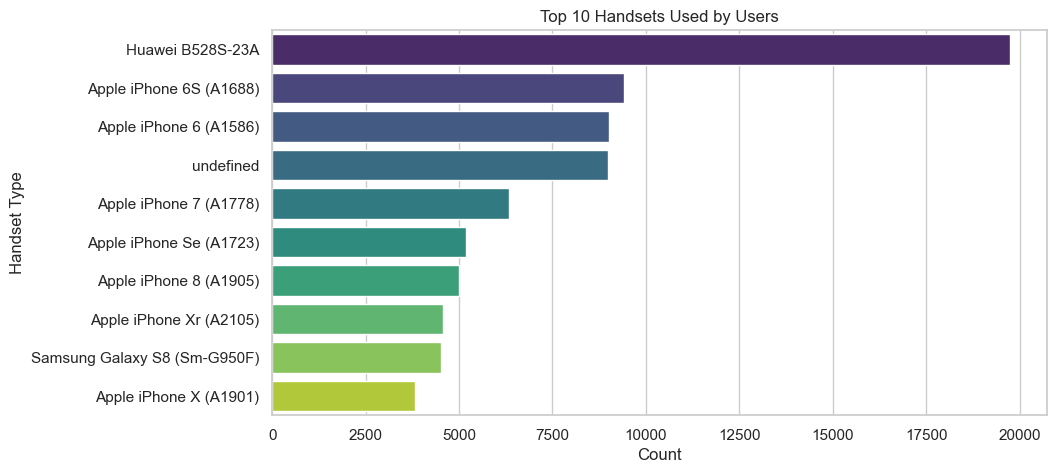

Top 3 Handset Manufacturers:
 Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

Top 5 Handsets for Apple:
 Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 Handsets for Samsung:
 Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 Handsets for Huawei:
 Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


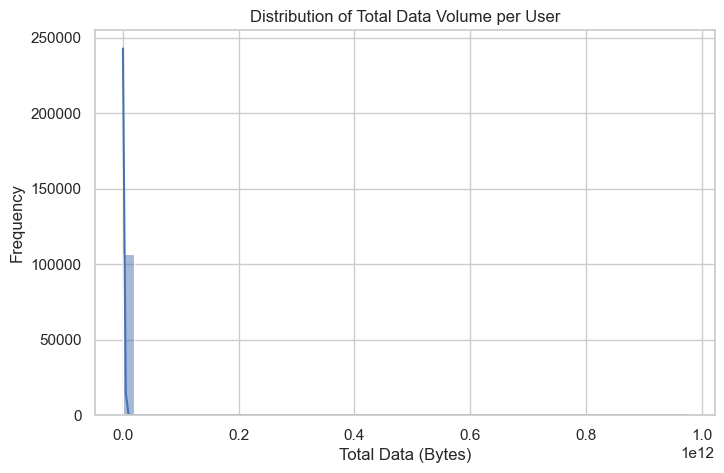

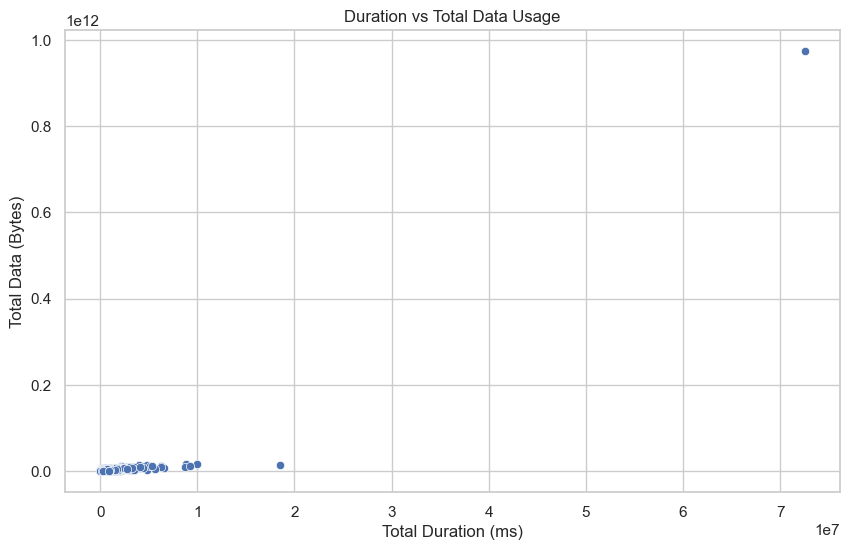

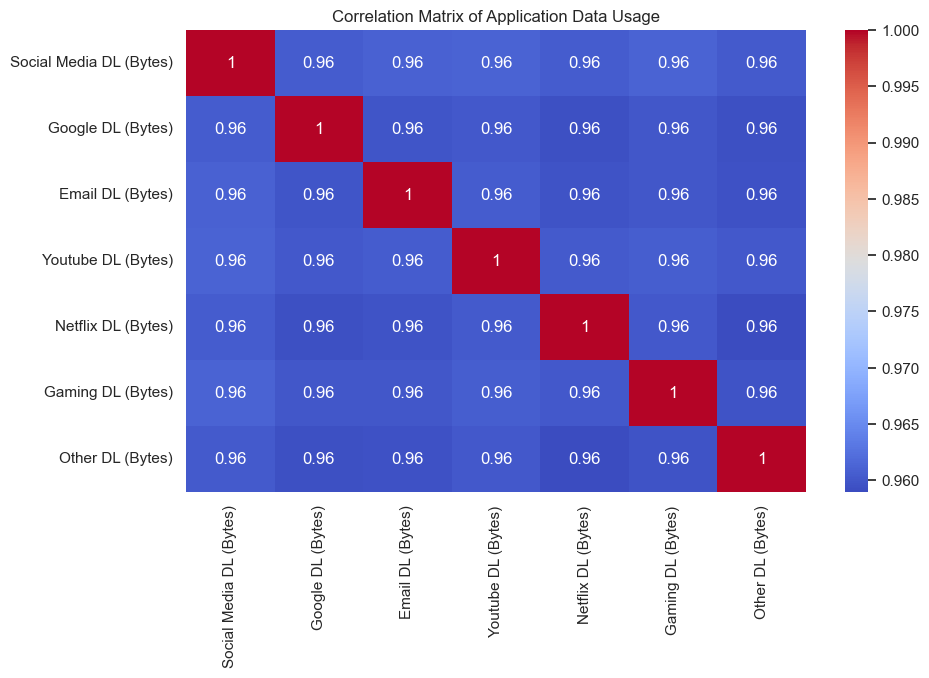

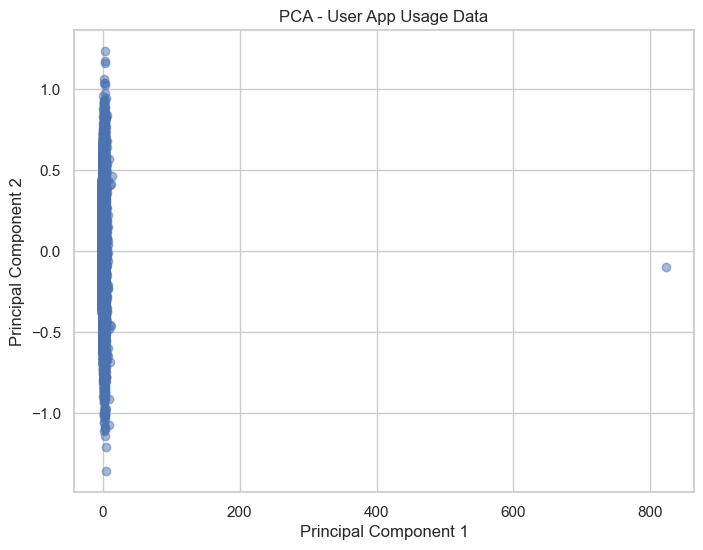

Explained Variance Ratio: [0.96581774 0.00587256]


In [2]:
# ===================== 1. IMPORTING LIBRARIES =====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

# ===================== 2. LOADING DATA =====================
df = pd.read_csv("telcom_data (2).xlsx - Sheet1.csv")

# ===================== 3. BASIC EXPLORATION =====================
print("Shape of dataset:", df.shape)
print("Columns:\n", df.columns)
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())

# ===================== 4. DATA CLEANING =====================
# Filling missing values with column mean (for numeric columns only)
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# ===================== 5. TOP 10 HANDSETS =====================
top_10_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:\n", top_10_handsets)

# Plotting
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette="viridis")
plt.title("Top 10 Handsets Used by Users")
plt.xlabel("Count")
plt.ylabel("Handset Type")
plt.show()

# ===================== 6. TOP 3 MANUFACTURERS =====================
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:\n", top_3_manufacturers)

# ===================== 7. TOP 5 HANDSETS PER TOP 3 MANUFACTURER =====================
for brand in top_3_manufacturers.index:
    subset = df[df['Handset Manufacturer'] == brand]
    top_handsets = subset['Handset Type'].value_counts().head(5)
    print(f"\nTop 5 Handsets for {brand}:\n", top_handsets)

# ===================== 8. AGGREGATE PER USER (xDR STATS) =====================
# Assumed columns: Session Duration, Total DL (Bytes), Total UL (Bytes), etc.
agg_df = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
})

# Add total download/upload and total volume
agg_df['Total Download'] = agg_df.filter(like='DL').sum(axis=1)
agg_df['Total Upload'] = agg_df.filter(like='UL').sum(axis=1)
agg_df['Total Data Volume'] = agg_df['Total Download'] + agg_df['Total Upload']

# Reset index for plotting
agg_df = agg_df.reset_index()

# ===================== 9. UNIVARIATE ANALYSIS =====================
# Example: Total Data Volume
plt.figure(figsize=(8,5))
sns.histplot(agg_df['Total Data Volume'], kde=True, bins=50)
plt.title("Distribution of Total Data Volume per User")
plt.xlabel("Total Data (Bytes)")
plt.ylabel("Frequency")
plt.show()

# ===================== 10. BIVARIATE ANALYSIS =====================
plt.figure(figsize=(10, 6))
sns.scatterplot(data=agg_df, x='Dur. (ms)', y='Total Data Volume')
plt.title("Duration vs Total Data Usage")
plt.xlabel("Total Duration (ms)")
plt.ylabel("Total Data (Bytes)")
plt.show()

# ===================== 11. CORRELATION ANALYSIS =====================
corr_cols = [
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)'
]
corr_matrix = agg_df[corr_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Application Data Usage")
plt.show()

# ===================== 12. PCA (Dimensionality Reduction) =====================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = agg_df[corr_cols]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0], principal_components[:,1], alpha=0.5)
plt.title('PCA - User App Usage Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# PCA Explained Variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)



Top 10 Users by Session Count:
 MSISDN/Number
4.188282e+10    1066
3.362632e+10      18
3.361489e+10      17
3.362578e+10      17
3.365973e+10      16
3.367588e+10      15
3.376054e+10      15
3.366716e+10      13
3.360313e+10      12
3.378632e+10      12
Name: Session Count, dtype: int64

Top 10 Users by Total Duration (ms):
 MSISDN/Number
4.188282e+10    7.255100e+07
3.362578e+10    1.855375e+07
3.361489e+10    9.966898e+06
3.376054e+10    9.279434e+06
3.362632e+10    8.791927e+06
3.366716e+10    8.744914e+06
3.366284e+10    6.614270e+06
3.366469e+10    6.288730e+06
3.360313e+10    6.287761e+06
3.366746e+10    5.649882e+06
Name: Total Duration (ms), dtype: float64

Top 10 Users by Total Upload (Bytes):
 MSISDN/Number
4.188282e+10    4.436642e+10
3.362578e+10    7.295774e+08
3.376054e+10    7.034786e+08
3.361489e+10    6.894830e+08
3.362632e+10    6.696507e+08
3.365973e+10    6.242603e+08
3.367588e+10    5.815688e+08
3.366716e+10    5.663264e+08
3.369879e+10    5.303431e+08
3.376041e

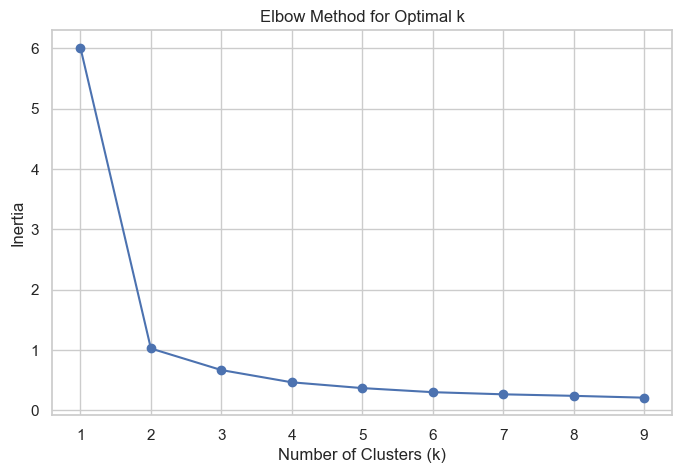

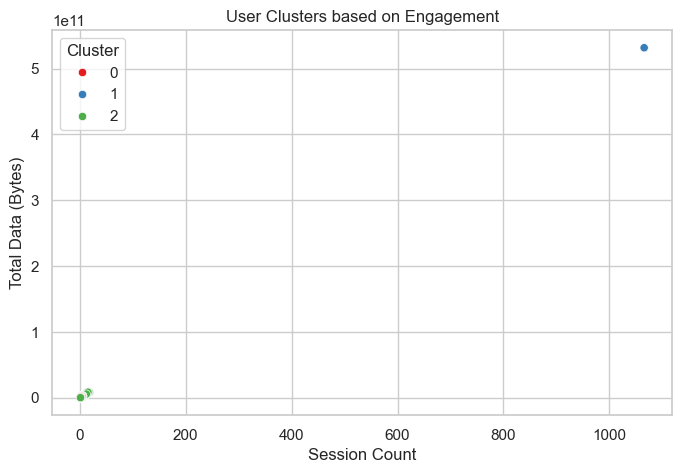


Top 10 Most Engaged Users in Social Media DL (Bytes):
 MSISDN/Number
4.188282e+10    1.937715e+09
3.362632e+10    4.274384e+07
3.376054e+10    3.929765e+07
3.365973e+10    3.490044e+07
3.361489e+10    2.774974e+07
3.362578e+10    2.656412e+07
3.366716e+10    2.375375e+07
3.378632e+10    2.356866e+07
3.366907e+10    2.347705e+07
3.360313e+10    2.277668e+07
Name: Social Media DL (Bytes), dtype: float64

Top 10 Most Engaged Users in Google DL (Bytes):
 MSISDN/Number
4.188282e+10    6.007942e+09
3.362632e+10    1.161065e+08
3.362578e+10    1.079047e+08
3.361489e+10    9.394171e+07
3.365973e+10    9.095855e+07
3.376054e+10    8.862653e+07
3.367588e+10    8.300299e+07
3.378632e+10    7.881981e+07
3.360313e+10    7.394206e+07
3.376127e+10    7.294980e+07
Name: Google DL (Bytes), dtype: float64

Top 10 Most Engaged Users in Email DL (Bytes):
 MSISDN/Number
4.188282e+10    1.904048e+09
3.361489e+10    3.360721e+07
3.362632e+10    3.340478e+07
3.362578e+10    3.189541e+07
3.378632e+10    3.087

C:\Users\KARAN\AppData\Local\Temp\ipykernel_19316\395391744.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top3_apps.index, y=top3_apps.values, palette="Blues_d")


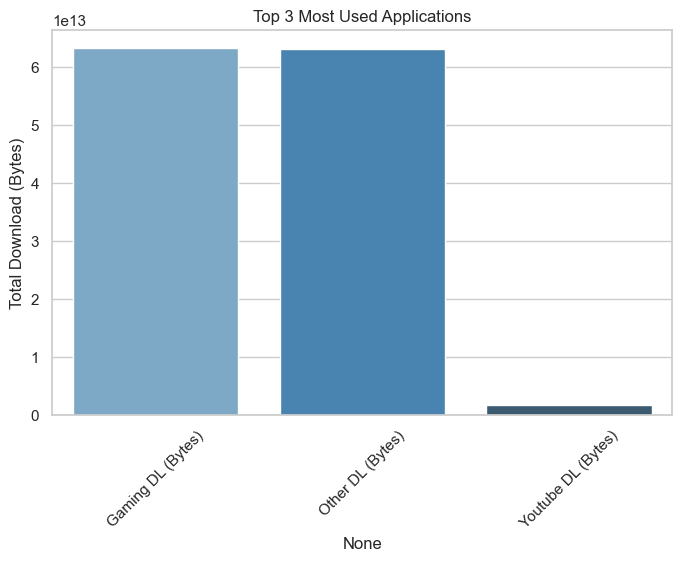

In [3]:
# ===================== 1. IMPORTING LIBRARIES =====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

sns.set(style="whitegrid")
%matplotlib inline

# ===================== 2. LOAD YOUR EXISTING DATAFRAME =====================
# Already done in Task 1: df = pd.read_csv("telcom_data (2).xlsx - Sheet1.csv")
# Make sure your df is already cleaned and loaded before running this

# ===================== 3. AGGREGATE ENGAGEMENT METRICS PER USER =====================
engagement_df = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',                    # session frequency
    'Dur. (ms)': 'sum',                      # total session duration
    'Total UL (Bytes)': 'sum',               # total upload
    'Total DL (Bytes)': 'sum'                # total download
})

engagement_df.columns = ['Session Count', 'Total Duration (ms)', 'Total Upload (Bytes)', 'Total Download (Bytes)']
engagement_df['Total Data (Bytes)'] = engagement_df['Total Upload (Bytes)'] + engagement_df['Total Download (Bytes)']

# ===================== 4. TOP 10 USERS BY EACH METRIC =====================
for metric in engagement_df.columns:
    print(f"\nTop 10 Users by {metric}:\n", engagement_df[metric].sort_values(ascending=False).head(10))

# ===================== 5. NORMALIZATION FOR CLUSTERING =====================
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(engagement_df)

# ===================== 6. K-MEANS CLUSTERING (k=3) =====================
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_df['Cluster'] = kmeans.fit_predict(norm_data)

# ===================== 7. CLUSTER-WISE METRICS =====================
cluster_summary = engagement_df.groupby('Cluster').agg({
    'Session Count': ['min', 'max', 'mean', 'sum'],
    'Total Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Data (Bytes)': ['min', 'max', 'mean', 'sum']
})

print("\nCluster-wise Engagement Summary:\n", cluster_summary)

# ===================== 8. ELBOW METHOD TO FIND OPTIMAL K =====================
inertia = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(norm_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# ===================== 9. VISUALIZE USER CLUSTERS =====================
plt.figure(figsize=(8,5))
sns.scatterplot(x=engagement_df['Session Count'], y=engagement_df['Total Data (Bytes)'], hue=engagement_df['Cluster'], palette='Set1')
plt.title('User Clusters based on Engagement')
plt.xlabel('Session Count')
plt.ylabel('Total Data (Bytes)')
plt.show()

# ===================== 10. MOST ENGAGED USERS PER APPLICATION =====================
app_cols = [
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)'
]

for app in app_cols:
    top_users = df.groupby('MSISDN/Number')[app].sum().sort_values(ascending=False).head(10)
    print(f"\nTop 10 Most Engaged Users in {app}:\n", top_users)

# ===================== 11. PLOT TOP 3 MOST USED APPLICATIONS =====================
total_app_usage = df[app_cols].sum().sort_values(ascending=False)
top3_apps = total_app_usage.head(3)

plt.figure(figsize=(8,5))
sns.barplot(x=top3_apps.index, y=top3_apps.values, palette="Blues_d")
plt.title("Top 3 Most Used Applications")
plt.ylabel("Total Download (Bytes)")
plt.xticks(rotation=45)
plt.show()


C:\Users\KARAN\AppData\Local\Temp\ipykernel_19316\1738272440.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  experience_df[col].fillna(experience_df[col].mean(), inplace=True)



Top 10 Users by Avg TCP Retransmission:
 MSISDN/Number
3.369858e+10    4.289488e+09
3.365871e+10    4.288060e+09
3.366491e+10    4.268432e+09
3.365863e+10    4.254644e+09
3.366613e+10    4.211189e+09
3.366877e+10    4.166591e+09
3.366131e+10    4.131046e+09
3.366240e+10    4.117753e+09
3.366682e+10    3.968072e+09
3.376264e+10    3.785295e+09
Name: Avg TCP Retransmission, dtype: float64

Bottom 10 Users by Avg TCP Retransmission:
 MSISDN/Number
3.366454e+10    2.0
3.376154e+10    2.0
3.376154e+10    4.0
3.376162e+10    4.0
3.369900e+10    4.0
3.376151e+10    4.0
3.369906e+10    4.0
3.376399e+10    4.0
3.376394e+10    4.0
3.366933e+10    4.0
Name: Avg TCP Retransmission, dtype: float64

Most Frequent Value in Avg TCP Retransmission:  20809914.27034193

Top 10 Users by Avg RTT (ms):
 MSISDN/Number
3.366232e+10    96923.0
3.368369e+10    54847.0
3.366087e+10    32333.0
3.376094e+10    26971.0
3.360679e+10    26250.0
3.367182e+10    25602.0
3.378187e+10    25374.0
3.378401e+10    24733.0


C:\Users\KARAN\AppData\Local\Temp\ipykernel_19316\1738272440.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


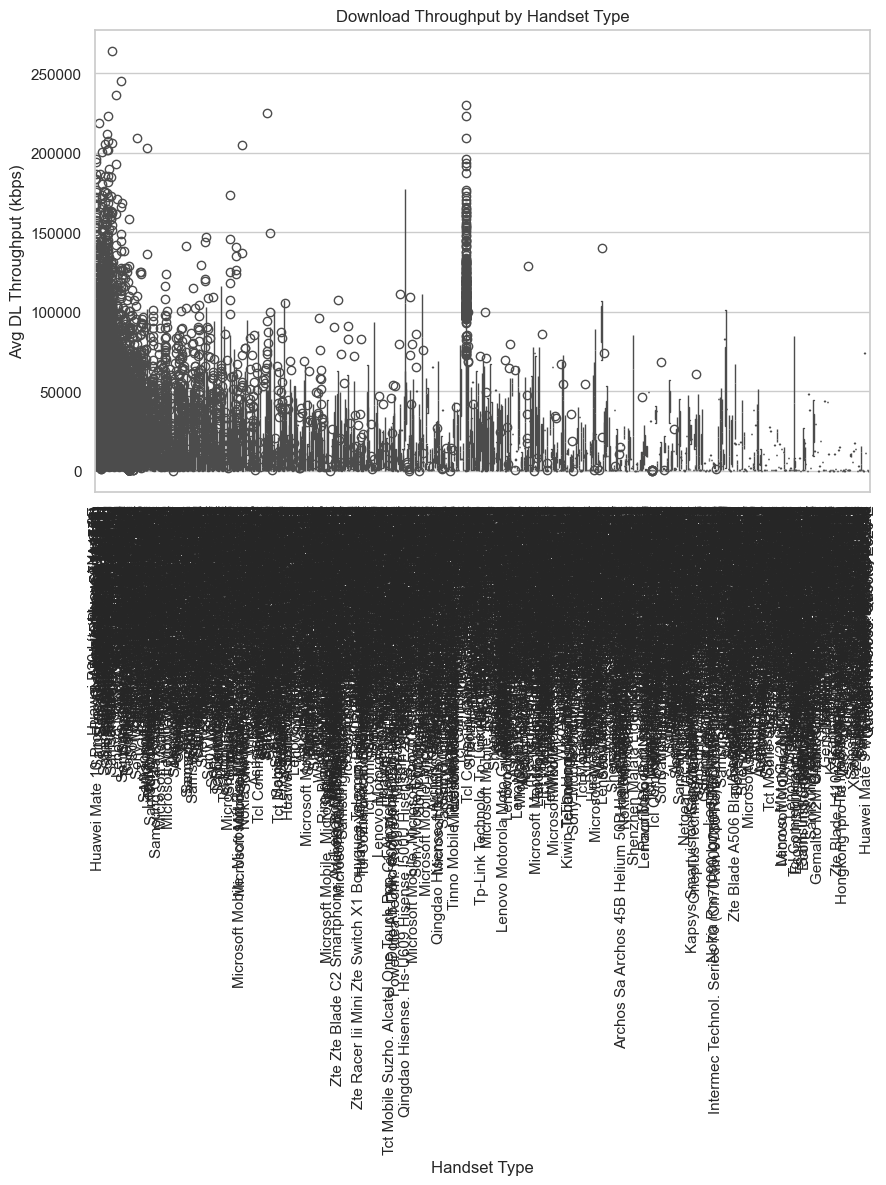

C:\Users\KARAN\AppData\Local\Temp\ipykernel_19316\1738272440.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


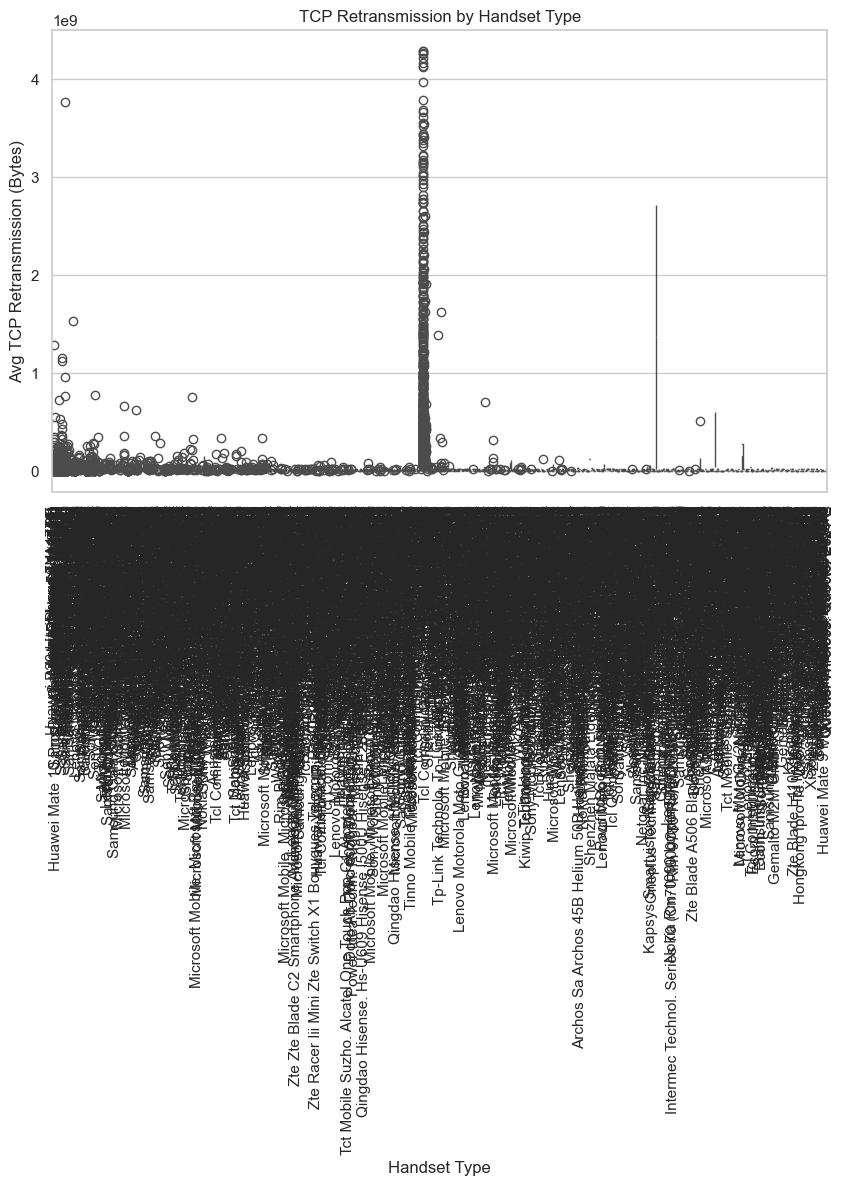


Experience Cluster Summary:
                     Avg TCP Retransmission  Avg RTT (ms)  Avg DL TP (kbps)  \
Experience Cluster                                                           
0                             1.656163e+07    127.656247       2852.635101   
1                             2.859611e+07     82.640229      41536.261961   
2                             5.628666e+07     79.762108      56771.344782   

                    Avg UL TP (kbps)  
Experience Cluster                    
0                         358.312843  
1                        3332.930721  
2                       18119.336144  


In [8]:
# ===================== 1. IMPORT LIBRARIES =====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

sns.set(style="whitegrid")
%matplotlib inline

# ===================== 2. AGGREGATE EXPERIENCE METRICS =====================
experience_df = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'Handset Type': lambda x: x.mode()[0]  # Most frequent handset per user
})

experience_df.columns = ['Avg TCP Retransmission', 'Avg RTT (ms)', 'Avg DL TP (kbps)', 'Avg UL TP (kbps)', 'Handset Type']

# ===================== 3. HANDLE MISSING VALUES =====================
for col in experience_df.select_dtypes(include=[np.number]).columns:
    experience_df[col].fillna(experience_df[col].mean(), inplace=True)

# ===================== 4. TOP 10, BOTTOM 10, MOST FREQUENT =====================
for col in ['Avg TCP Retransmission', 'Avg RTT (ms)', 'Avg DL TP (kbps)']:
    print(f"\nTop 10 Users by {col}:\n", experience_df[col].sort_values(ascending=False).head(10))
    print(f"\nBottom 10 Users by {col}:\n", experience_df[col].sort_values(ascending=True).head(10))
    print(f"\nMost Frequent Value in {col}: ", experience_df[col].mode()[0])

# ===================== 5. THROUGHPUT BY HANDSET TYPE =====================
plt.figure(figsize=(10, 6))
sns.boxplot(x='Handset Type', y='Avg DL TP (kbps)', data=experience_df)
plt.xticks(rotation=90)
plt.title("Download Throughput by Handset Type")
plt.ylabel("Avg DL Throughput (kbps)")
plt.xlabel("Handset Type")
plt.tight_layout()
plt.show()

# ===================== 6. TCP RETRANSMISSION BY HANDSET TYPE =====================
plt.figure(figsize=(10, 6))
sns.boxplot(x='Handset Type', y='Avg TCP Retransmission', data=experience_df)
plt.xticks(rotation=90)
plt.title("TCP Retransmission by Handset Type")
plt.ylabel("Avg TCP Retransmission (Bytes)")
plt.xlabel("Handset Type")
plt.tight_layout()
plt.show()

# ===================== 7. KMEANS CLUSTERING =====================
features_exp = experience_df[['Avg TCP Retransmission', 'Avg RTT (ms)', 'Avg DL TP (kbps)', 'Avg UL TP (kbps)']]
scaler = MinMaxScaler()
scaled_exp = scaler.fit_transform(features_exp)

kmeans_exp = KMeans(n_clusters=3, random_state=42)
experience_df['Experience Cluster'] = kmeans_exp.fit_predict(scaled_exp)

# ===================== 8. CLUSTER DESCRIPTION =====================
cluster_summary = experience_df.groupby('Experience Cluster').agg({
    'Avg TCP Retransmission': 'mean',
    'Avg RTT (ms)': 'mean',
    'Avg DL TP (kbps)': 'mean',
    'Avg UL TP (kbps)': 'mean'
})

print("\nExperience Cluster Summary:\n", cluster_summary)



Top 10 Satisfied Users:
        MSISDN/Number  Satisfaction Score
70079   3.366877e+10        2.678804e+11
85785   3.369858e+10        2.678060e+11
32273   3.365871e+10        2.677302e+11
48341   3.366240e+10        2.677055e+11
43629   3.366131e+10        2.677021e+11
58026   3.366491e+10        2.676693e+11
98211   3.376264e+10        2.676376e+11
31942   3.365863e+10        2.675561e+11
70421   3.366890e+10        2.675238e+11
37810   3.365990e+10        2.675091e+11

Regression Coefficients: [0.5 0.5]
Intercept: -6.103515625e-05
R² Score: 1.0


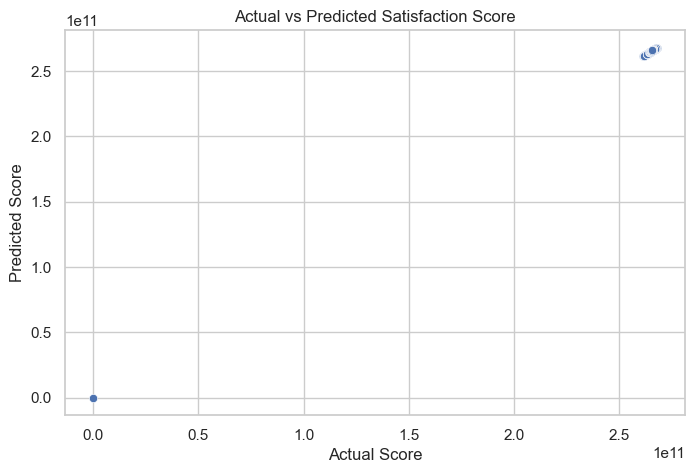


Average Scores per Satisfaction Cluster:
                       Engagement Score  Experience Score  Satisfaction Score
Satisfaction Cluster                                                        
0                         5.310538e+11      4.660949e+07        2.655502e+11
1                         0.000000e+00      3.973637e+07        1.986818e+07


In [9]:
# ===================== 1. IMPORTS =====================
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# ===================== 2. RESET INDICES & MERGE =====================
eng_df = engagement_df.copy()
exp_df = experience_df.copy()

eng_df = eng_df.reset_index()
exp_df = exp_df.reset_index()

merged_df = pd.merge(eng_df, exp_df, on='MSISDN/Number')

# ===================== 3. CALCULATE ENGAGEMENT SCORE =====================
low_eng_cluster = eng_df[eng_df['Cluster'] == eng_df['Cluster'].value_counts().idxmin()]
low_eng_centroid = low_eng_cluster[['Session Count', 'Total Duration (ms)', 'Total Data (Bytes)']].mean().values

merged_df['Engagement Score'] = merged_df.apply(
    lambda row: euclidean_distances(
        [row[['Session Count', 'Total Duration (ms)', 'Total Data (Bytes)']].values],
        [low_eng_centroid]
    )[0][0], axis=1)

# ===================== 4. CALCULATE EXPERIENCE SCORE =====================
worst_exp_cluster = exp_df[exp_df['Experience Cluster'] == exp_df['Experience Cluster'].value_counts().idxmin()]
worst_exp_centroid = worst_exp_cluster[['Avg TCP Retransmission', 'Avg RTT (ms)', 'Avg DL TP (kbps)', 'Avg UL TP (kbps)']].mean().values

merged_df['Experience Score'] = merged_df.apply(
    lambda row: euclidean_distances(
        [row[['Avg TCP Retransmission', 'Avg RTT (ms)', 'Avg DL TP (kbps)', 'Avg UL TP (kbps)']].values],
        [worst_exp_centroid]
    )[0][0], axis=1)

# ===================== 5. CALCULATE SATISFACTION SCORE =====================
merged_df['Satisfaction Score'] = merged_df[['Engagement Score', 'Experience Score']].mean(axis=1)

# ===================== 6. TOP 10 SATISFIED USERS =====================
top_users = merged_df[['MSISDN/Number', 'Satisfaction Score']].sort_values(by='Satisfaction Score', ascending=False).head(10)
print("\nTop 10 Satisfied Users:\n", top_users)

# ===================== 7. REGRESSION MODEL =====================
X = merged_df[['Engagement Score', 'Experience Score']]
y = merged_df['Satisfaction Score']

model = LinearRegression()
model.fit(X, y)

print("\nRegression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", model.score(X, y))

# ===================== 8. VISUALIZE ACTUAL vs PREDICTED =====================
merged_df['Predicted Score'] = model.predict(X)

plt.figure(figsize=(8,5))
sns.scatterplot(x=merged_df['Satisfaction Score'], y=merged_df['Predicted Score'])
plt.title("Actual vs Predicted Satisfaction Score")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# ===================== 9. CLUSTERING USERS BASED ON SCORES =====================
from sklearn.cluster import KMeans

score_features = merged_df[['Engagement Score', 'Experience Score']]
kmeans_scores = KMeans(n_clusters=2, random_state=42)
merged_df['Satisfaction Cluster'] = kmeans_scores.fit_predict(score_features)

# ===================== 10. AVERAGE SCORE PER CLUSTER =====================
cluster_avg = merged_df.groupby('Satisfaction Cluster')[['Engagement Score', 'Experience Score', 'Satisfaction Score']].mean()
print("\nAverage Scores per Satisfaction Cluster:\n", cluster_avg)
